# LAB 2

## Question 2.a

$$\theta'' = \lambda\theta$$

wrt: 
$$\theta(0) = 1$$
$$\theta'(1) = 0$$

In [162]:
import numpy as np
import pandas as pd

In [ ]:
x1 = 0
x2 = 1
h = 0.25

In [163]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(h=0.25):
    n = int((x2-x1)/h)

    a = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    d = np.zeros(n-1)
    x_f = np.zeros(n-1)
    
    b[0] = -1*( 2/(h*h) + 2 )
    c[0] = ( 1/(h*h) )
    d[0] = -1*(1/(h*h))
    x_f[0] = x1+h
    
    for i in range(1, n-2):
        x_f[i] = x1+(i+1)*h
        a[i] = ( 1/(h*h) )

    for i in range(1, n-2):
        b[i] =-1*( 2 + 2/(h*h) )

    for i in range(1, n-2):
        c[i] = ( 1/(h*h) )
        
    a[-1] = ( 2/(3*h*h) )
    b[-1] = -1*(2/(3*h*h) + 2 )
    x_f[-1] = x2-h
    
    c_, d_ = thomas_(a,b,c,d)
    res = np.zeros(n-1)

    res[-1] = d_[-1]
    for i in range(n-2):
        res[n-3-i] = d_[n-3-i] - res[n-2-i]*c_[n-3-i]
        
    return [res, x_f]

In [167]:
a_1, x_1 = main_(0.01)
a_2, x_2 = main_(0.025)
a_3, x_3 = main_(0.05)
a_4, x_4 = main_(0.1)

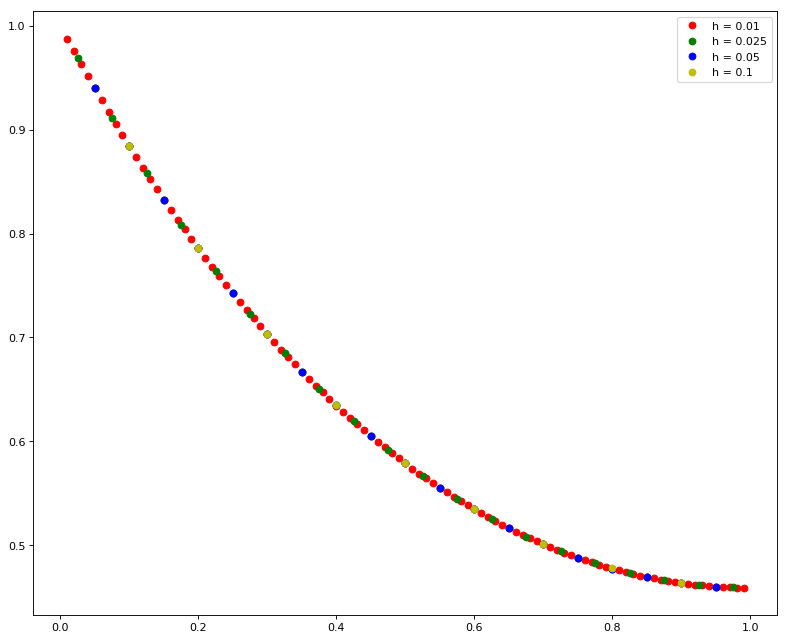

In [168]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 0.01')
plt.plot(x_2, (a_2),  'go', label = 'h = 0.025')
plt.plot(x_3, (a_3),  'bo', label = 'h = 0.05')
plt.plot(x_4, (a_4), 'yo', label = 'h = 0.1')
plt.legend(loc='best')
plt.show()

## Question 2.b

$$ y'' - 2xy' - 2y = -4x $$
Subject to:
$$y(0)-y'(0) = 0$$
$$2y(1)-y'(1) = 1$$

In [125]:
x1 = 0
x2 = 1
h = 0.1

In [153]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(h=0.1):
    n = int((x2-x1)/h)
    
    x_f = np.zeros(n+1)
    x[0] = 0
    x[-1] = 1
    
    a = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    d = np.zeros(n-1)
    
    b[0] = -1*( (2/(h*h) + 2) - (1/(h*h) + (x1+h)/h)*(4/(2*h+3)) )
    c[0] = ( (1/(h*h) - (x1+h)/h) - (1/(h*h) + (x1+h)/h)*(1/(2*h+3)) )
    d[0] = -4 * (x1+h)
    x_f[1] = x1+h
    
    for i in range(1, n-2):
        x_i = x1+(i*h)
        x_f[i+1] = x_i
        a[i] = ( 1/(h*h) + x_i/h )
    

    for i in range(1, n-2):
        x_i = x1+(i*h)
        b[i] = -1 * ( 2/(h*h) +2 )
        
    for i in range(1, n-2):
        x_i = x1+(i*h)
        c[i] = ( 1/(h*h) - x_i/h )

    
    for i in range(1, n-2):
        x_i = x1+(i*h)
        d[i] = -4 * (x_i)
        
    x_n = x2-h
    x_f[-2] = x_n
    a[-1] = ( (1/(h*h) + x_n/h) + (1/(h*h) - x_n/h)*(1/(4*h-3)) )
    b[-1] = -1 * ( (2/(h*h) + 2) + (1/(h*h) - x_n/h)*(4/(4*h-3)) )
    d[-1] = -4*x_n - ( 2*h/(4*h-3))*(1/(h*h) - x_n/h )
    
    
    c_, d_ = thomas_(a,b,c,d)
    res = np.zeros(n-1)

    res[-1] = d_[-1]
    for i in range(n-2):
        res[n-3-i] = d_[n-3-i] - res[n-2-i]*c_[n-3-i]
        
    res_final = np.zeros(n+1)
    
    for i in range(1,n):
        res_final[i] = res[i-1]
    
    res_final[0] = 4*(res[0]-res[1])/(2*h+3)
    res_final[-1] = (2*h - 4*res[-1] + res[-2])/(4*h-3)
    
    return [res_final, x_f]

In [154]:
a_1, x_1 = main_(0.001)
a_2, x_2 = main_(0.025)
a_3, x_3 = main_(0.05)
a_4, x_4 = main_(0.1)


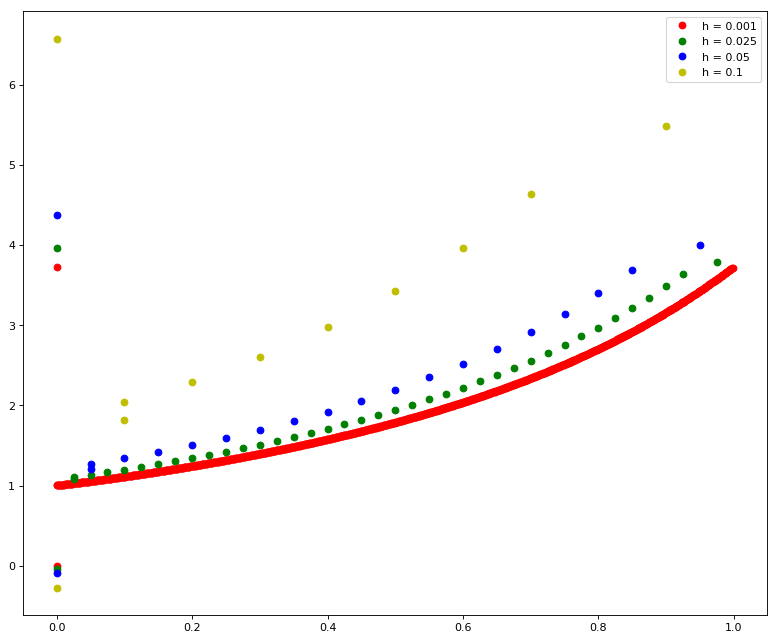

In [161]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 0.001')
plt.plot(x_2, (a_2),  'go', label = 'h = 0.025')
plt.plot(x_3, (a_3),  'bo', label = 'h = 0.05')
plt.plot(x_4, (a_4), 'yo', label = 'h = 0.1')
plt.legend(loc='best')
plt.show()

## Question 2.c

$$y'' + y' = 0$$

wrt: 
$$y(0) = 0$$
$$y(1) = 1$$

In [33]:
x1 = 0
x2 = 1
h = 0.25

In [175]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(h=0.25):
    n = int((x2-x1)/h)

    a = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    d = np.zeros(n-1)
    x_f = np.zeros(n-1)
    
    b[0] = ( 1- 2/(h*h) )
    c[0] = ( 1/(h*h) )
    x_f[0] = x1+h
    
    for i in range(1, n-2):
        x_f[i] = x1+(i+1)*h
        a[i] = ( 1/(h*h) )

    for i in range(1, n-2):
        b[i] =( 1 - 2/(h*h) )

    for i in range(1, n-2):
        c[i] = ( 1/(h*h) )
        
    a[-1] = ( 1/(h*h) )
    b[-1] = ( 1 -  2/(h*h) )
    d[-1] = -1/(h*h)
    x_f[-1] = x2-h
    
    c_, d_ = thomas_(a,b,c,d)
    res = np.zeros(n-1)

    res[-1] = d_[-1]
    for i in range(n-2):
        res[n-3-i] = d_[n-3-i] - res[n-2-i]*c_[n-3-i]
    
    pred = np.zeros(res.shape)

    for i in range(1, n):
        x_i = x1+i*h
        pred[i-1] = np.sin(x_i)/np.sin(1)
        
    return [res, pred, x_f]

In [178]:
a_1, pred, x_1 = main_(0.001)
a_11, pred, x_11 = main_(0.01)
a_2, pred, x_2 = main_(0.025)
a_3, pred, x_3 = main_(0.05)
a_4, pred, x_4 = main_(0.1)

,x,real,h=0.25,h=0.125,h=0.0625,h=0.03125
0,0.25,0.294014,0.294274,0.294078,0.294030,0.294018
1,0.50,0.569747,0.570156,0.569849,0.569772,0.569753
2,0.75,0.810056,0.810403,0.810142,0.810078,0.810062


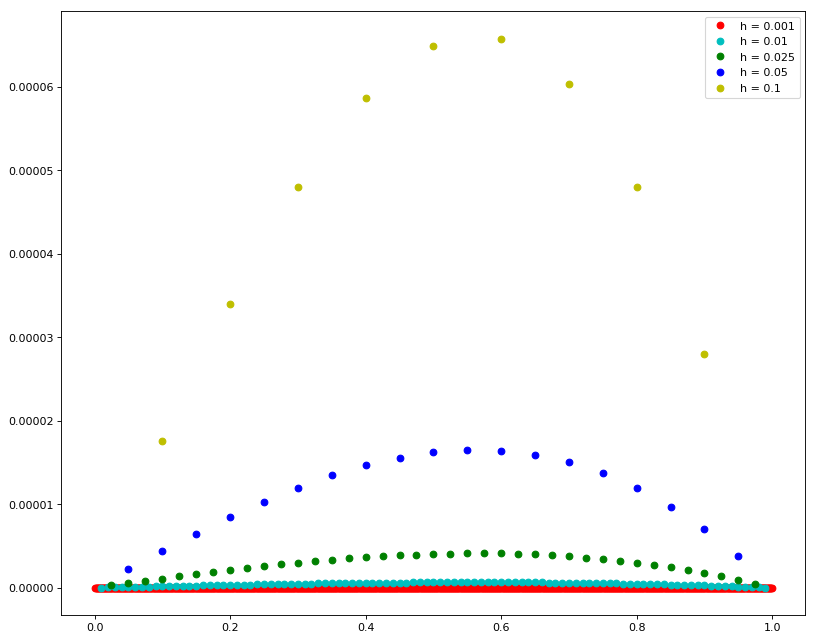

In [180]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1-np.sin(x_1)/np.sin(1), 'ro', label = 'h = 0.001')
plt.plot(x_11, a_11-np.sin(x_11)/np.sin(1), 'co', label = 'h = 0.01')
plt.plot(x_2, (a_2)-np.sin(x_2)/np.sin(1),  'go', label = 'h = 0.025')
plt.plot(x_3, (a_3)-np.sin(x_3)/np.sin(1),  'bo', label = 'h = 0.05')
plt.plot(x_4, (a_4)-np.sin(x_4)/np.sin(1), 'yo', label = 'h = 0.1')
plt.legend(loc='best')
plt.show()